In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import cv2
import os
import segyio
plt.rcParams["figure.figsize"] = (20, 10)

# Read Seis

In [2]:
seis = segyio.tools.cube('/home/zhangzr/FaultRecongnition/Fault_data/real_labeled_data/origin_data/seis/mig_fill.sgy')
label = segyio.tools.cube('/home/zhangzr/FaultRecongnition/Fault_data/real_labeled_data/origin_data/fault/label_fill.sgy')
with h5py.File('/home/zhangzr/FaultRecongnition/MIM-Med3D/output/Fault_Baseline/unetr_base_supbaseline_p16_v01/preds_whole/mig_fill.h5', 'r') as f:
    unetr_baseline_pred = f['predictions'][:]


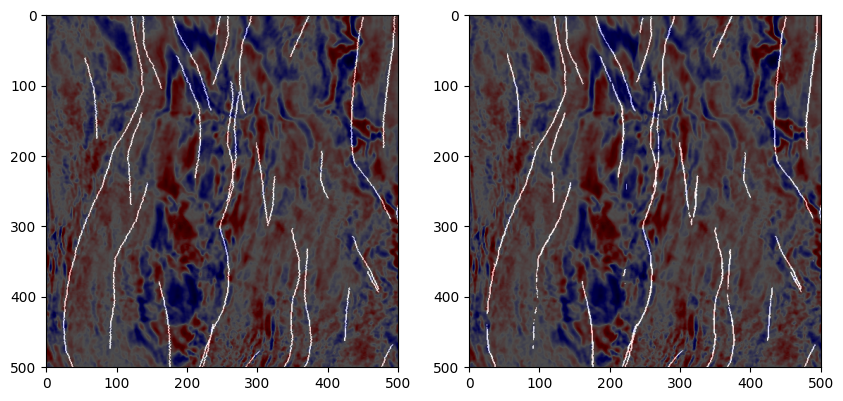

In [4]:
slice_id = 600
plt.subplot(1,2,1)
plt.imshow(seis[:,:,slice_id], cmap='seismic')
plt.imshow(label[:,:,slice_id], cmap='gray', alpha=0.7)
plt.subplot(1,2,2)
plt.imshow(seis[:,:,slice_id], cmap='seismic')
plt.imshow(unetr_baseline_pred[:,:,slice_id], cmap='gray', alpha=0.7)


# Visualize Predictions

In [2]:
seis = segyio.tools.cube('/home/zhangzr/FaultRecongnition/Fault_data/real_data/seis.sgy')
with h5py.File('/home/zhangzr/FaultRecongnition/MIM-Med3D/output/Fault_Baseline/unetr_base_supbaseline_p16_v01/real_preds/seis.h5', 'r') as f:
    unetr_baseline_pred = f['predictions'][:]
with h5py.File('/home/zhangzr/FaultRecongnition/MIM-Med3D/output/Fault_Baseline/swin_unetr_base_supbaseline_p16_v01/real_preds/seis.h5', 'r') as f:
    swin_unetr_baseline_pred = f['predictions'][:]

swin_transformer_pred = np.load('/home/zhangzr/FaultRecongnition/mmsegmentation/output/swin-base-patch4-window7_upernet_8xb2-160k_fault_public_slice-256x256/real_data_predict/predict.npy', mmap_mode='r')

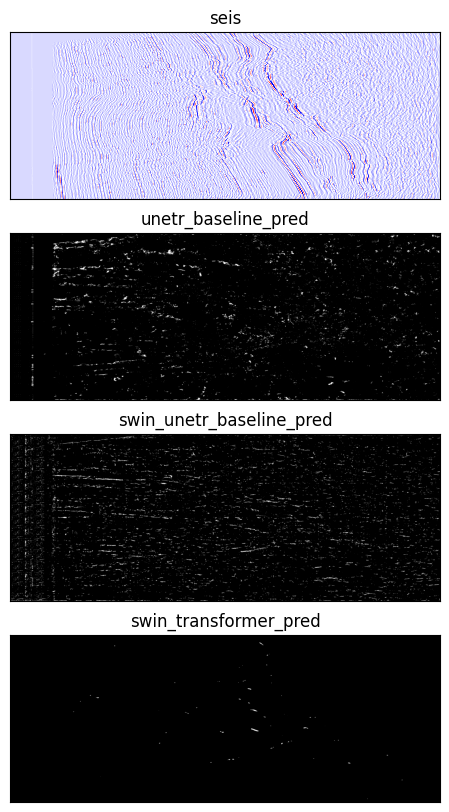

In [4]:
slice_id = 30
plt.subplot(4,1,1)
fig = plt.imshow(seis[slice_id,:,:], cmap='seismic')
fig.axes.set_title('seis')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(4,1,2)
fig = plt.imshow(1-unetr_baseline_pred[slice_id,:,:], cmap='binary')
fig.axes.set_title('unetr_baseline_pred')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(4,1,3)
fig = plt.imshow(1-swin_unetr_baseline_pred[slice_id,:,:], cmap='binary')
fig.axes.set_title('swin_unetr_baseline_pred')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(4,1,4)
fig = plt.imshow(1-swin_transformer_pred[slice_id,:,:], cmap='binary')
fig.axes.set_title('swin_transformer_pred')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

In [ ]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2    
    return img[starty:starty+cropy, startx:startx+cropx]

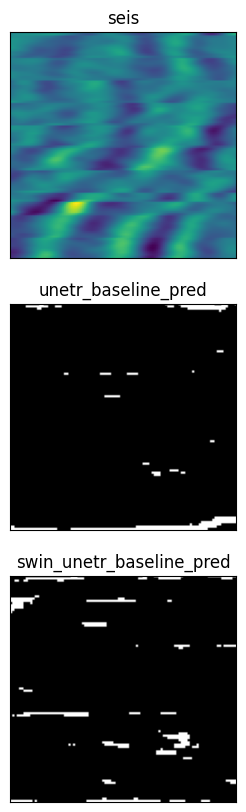

In [ ]:
slice_id = 500
plt.subplot(3,1,1)
fig = plt.imshow(crop_center(seis[:,slice_id,:], 101, 101))
fig.axes.set_title('seis')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(3,1,2)
fig = plt.imshow(1-crop_center(unetr_baseline_pred[:,slice_id,:], 101, 101), cmap='binary')
fig.axes.set_title('unetr_baseline_pred')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(3,1,3)
fig = plt.imshow(1-crop_center(swin_unetr_baseline_pred[:,slice_id,:], 101, 101), cmap='binary')
fig.axes.set_title('swin_unetr_baseline_pred')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

# Validation data

In [ ]:
ids = 99
with h5py.File(f'/home/zhangzr/FaultRecongnition/Fault_data/real_labeled_data/crop/val/{ids}.h5', 'r') as f:
    seis = f['raw'][:]
    gt = f['label'][:]

with h5py.File(f'/home/zhangzr/FaultRecongnition/MIM-Med3D/output/Fault_Baseline/unetr_base_supbaseline_p16_v01/preds/{ids}.h5', 'r') as f:
    unetr_baseline_pred = f['predictions'][:]

with h5py.File(f'/home/zhangzr/FaultRecongnition/MIM-Med3D/output/Fault_Baseline/swin_unetr_base_supbaseline_p16_v01/preds/{ids}.h5', 'r') as f:
    swin_unetr_baseline_pred = f['predictions'][:]

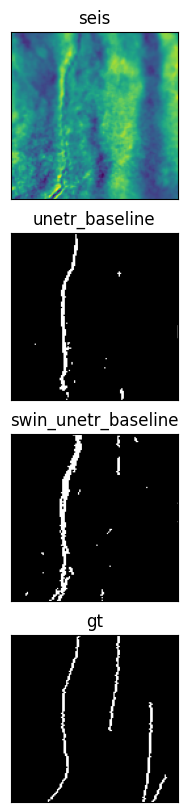

In [ ]:
slice_id = 100
plt.subplot(4,1,1)
fig = plt.imshow(seis[:,:,slice_id])
fig.axes.set_title('seis')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(4,1,2)
fig = plt.imshow(1-unetr_baseline_pred[:,:,slice_id], cmap='binary')
fig.axes.set_title('unetr_baseline')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(4,1,3)
fig = plt.imshow(1-swin_unetr_baseline_pred[:,:,slice_id], cmap='binary')
fig.axes.set_title('swin_unetr_baseline')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(4,1,4)
fig = plt.imshow(1-gt[:,:,slice_id], cmap='binary')
fig.axes.set_title('gt')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()